In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load CIFAR-10

In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train data
trainset = torchvision.datasets.STL10(root='./data',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


Files already downloaded and verified


# Show images

In [5]:
def show_images(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

horse   dog   car  ship


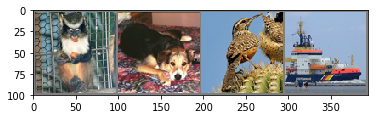

In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
show_images(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Cut Images

In [7]:
def cut_torch_imgs(imgs, shape = (4,4)):
    # imgs is a batch of images -- expected n*c*h*w
    # shape is the shape of each piece
    # returns n*pieces*c*h*w
    assert len(imgs.shape) == 4,"Provide batches of inputs"
    assert not imgs.shape[2] % shape[0], "undivisible height for piece size"
    assert not imgs.shape[3] % shape[1], "undivisible width for piece size"
    
    a = imgs.transpose(1, 2).transpose(2,3)
    c = a[0].shape[-1]
    x,y = a[0].shape[0]//shape[0], a[0].shape[1]//shape[1]
    b = a.reshape(-1,x,shape[0],y,shape[1],c).transpose(2,3)
    b = b.reshape(-1,x*y,shape[0],shape[1],c)
    #transpose to torch accepted standard
    b = b.transpose(3,4).transpose(2,3)
    return b

In [8]:
s = cut_torch_imgs(images[0:4], (32,32))

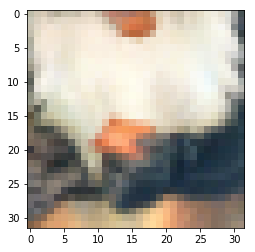

In [9]:
show_images(s[0][4])

In [10]:
images[0].shape

torch.Size([3, 96, 96])

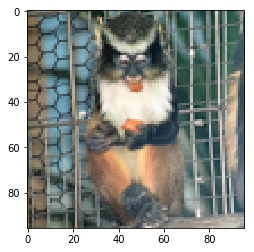

In [11]:
show_images(images[0])

# Models

In [12]:
vgg16 = models.vgg16(pretrained=True)

In [13]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

In [14]:
# model = nn.Sequential(*list(vgg16.features.children())[:24])
model = nn.Sequential(vgg16.features)

## test model

In [15]:
temp = model(s[0])

In [16]:
temp.view(s[0].shape[0],-1).shape, temp.shape

(torch.Size([9, 512]), torch.Size([9, 512, 1, 1]))

In [17]:
s[0].shape

torch.Size([9, 3, 32, 32])

# LSTM Model